In [17]:
#Importações
import os
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#Carregando dataset
os.environ['KAGGLE_USERNAME'] = "wesleyylg"
os.environ['KAGGLE_KEY'] = "KGAT_3743bab0a8a05ec025dc26274ea6f5ea"

dataset_url = "https://www.kaggle.com/datasets/wenruliu/adult-income-dataset"

od.download(dataset_url)

data_dir = './adult-income-dataset'
df = pd.read_csv(f"{data_dir}/adult.csv",na_values='?')

adulto = df.copy()

Skipping, found downloaded files in ".\adult-income-dataset" (use force=True to force download)


In [ ]:
#Quantidade de linhas e colunas
df.shape

(48842, 15)

In [6]:
#Tipos de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
#Estatísticas de cada coluna
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#Porcentagem de valores nulos em cada coluna
(df.isnull().sum() / len(df)) * 100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [9]:
#Checando linhas duplicadas
df.duplicated().sum()

52

C:\Users\PC\AppData\Local\Temp\ipykernel_3328\2782604513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='viridis')


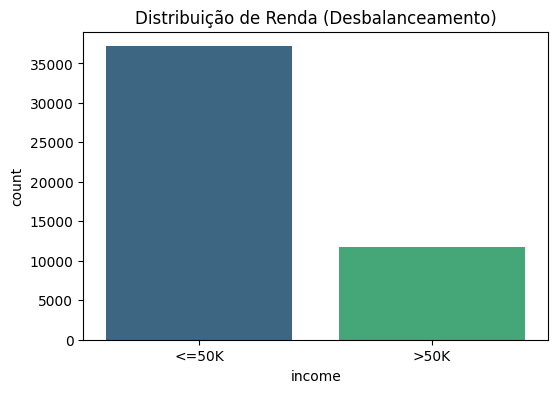

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df, palette='viridis')
plt.title('Distribuição de Renda (Desbalanceamento)')
plt.show()

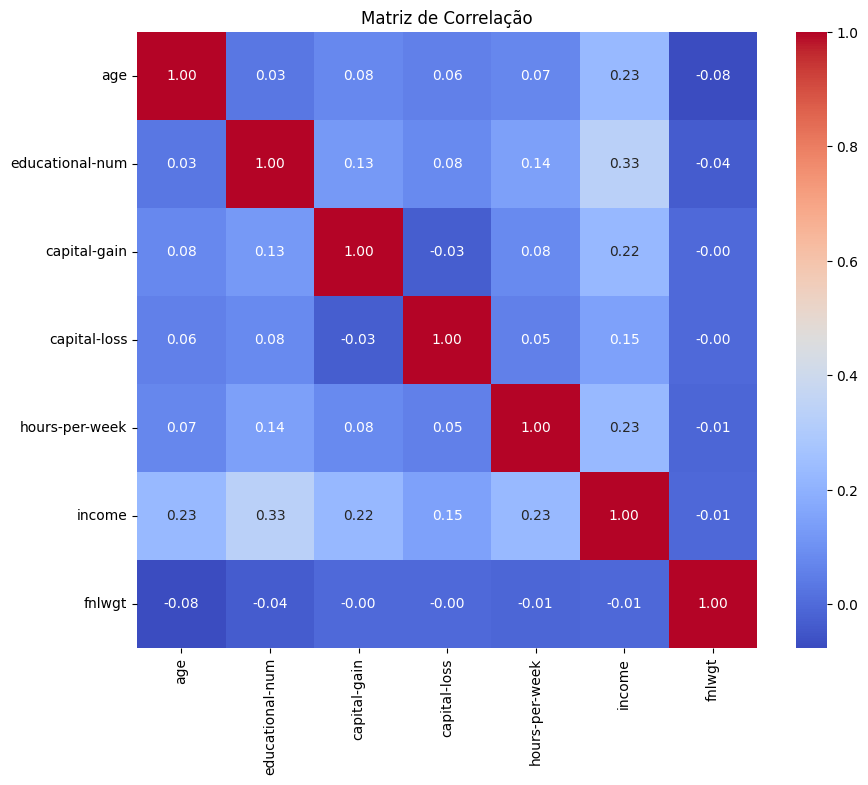

In [19]:
adulto['income'] = LabelEncoder().fit_transform(adulto['income'])

plt.figure(figsize=(10, 8))
corr = adulto[['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income','fnlwgt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()